In [149]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
col_list = ["NEWEdImpt","JobSat","ConvertedComp"]
data = pd.read_csv("C:/Users/noshi/Desktop/poralekha/Sem8/SoftwareMetrics/survey_results_public.csv",usecols=col_list)
#data = data.replace('NA', np.nan)
data.dropna()
#data.head
#list(data.columns.values)
print(data.shape)

(64461, 3)


In [150]:
data['NEWEdImpt'].value_counts()
#data['Hobbyist'] = data[np.isfinite(data['Hobbyist'])]
data['NEWEdImpt'] = data['NEWEdImpt'].map({'Not at all important/not necessary': 1, 'Somewhat important': 2,
                                          'Fairly important': 3, 'Very important': 4,
                                    'Critically important': 5})
data['JobSat'].value_counts()
data['JobSat'] = data['JobSat'].map({'Very dissatisfied': 1, 'Slightly dissatisfied': 2,
                                    'Neither satisfied nor dissatisfied': 3, 'Slightly satisfied': 4,
                                    'Very satisfied': 5})
data['ConvertedComp'].value_counts()

120000.0     341
100000.0     306
150000.0     277
2000000.0    258
1000000.0    258
            ... 
102700.0       1
68721.0        1
96250.0        1
38456.0        1
21487.0        1
Name: ConvertedComp, Length: 6958, dtype: int64

In [151]:
data['ConvertedComp']=(data['ConvertedComp']-data['ConvertedComp'].min())/(data['ConvertedComp'].max()-data['ConvertedComp'].min())
data['ConvertedComp'].value_counts()

0.060000    341
0.050000    306
0.075000    277
1.000000    258
0.500000    258
           ... 
0.031344      1
0.026340      1
0.004084      1
0.017875      1
0.007710      1
Name: ConvertedComp, Length: 6958, dtype: int64

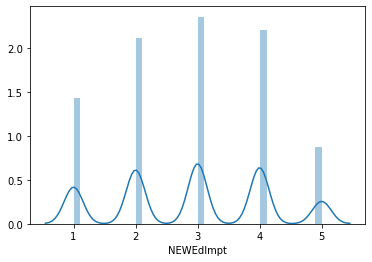

In [152]:
#histogram for normality check
#plt.hist(data['NEWEdImpt'])
#plt.show() 
sns.distplot(data_out['NEWEdImpt'])

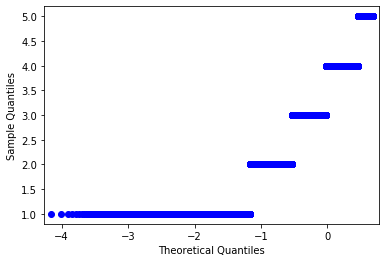

In [153]:
# q-q plot
qqplot(data['NEWEdImpt'], line='s')
plt.show()

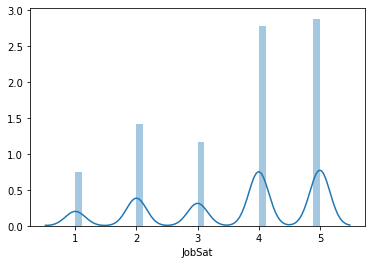

In [154]:
#plt.hist(data['JobSat'])
#plt.show() 
sns.distplot(data_out['JobSat'])

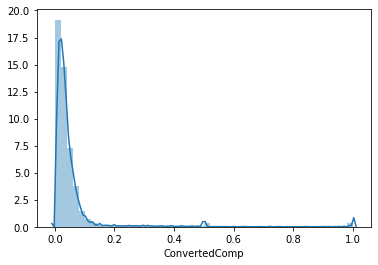

In [155]:
#plt.hist(data['ConvertedComp'])
#plt.show() 
sns.distplot(data['ConvertedComp'])

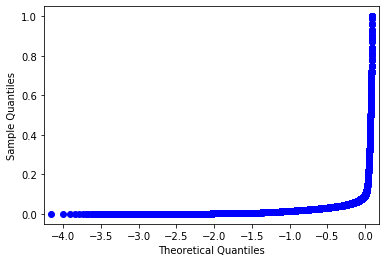

In [156]:
# q-q plot
qqplot(data['ConvertedComp'], line='s')
plt.show()

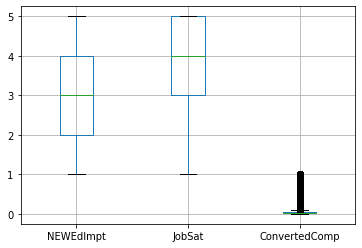

In [157]:
#checking equal variance with boxplot
boxplot = data.boxplot(column=['NEWEdImpt', 'JobSat', 'ConvertedComp'])

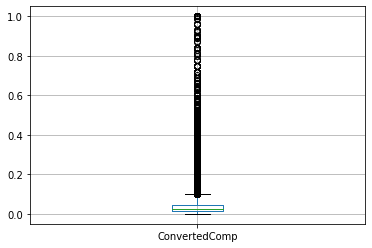

In [158]:
#checking equal variance with boxplot
boxplot = data.boxplot(column=['ConvertedComp'])

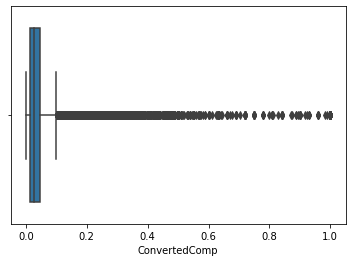

In [159]:
import seaborn as sns
sns.boxplot(x=data['ConvertedComp'])

In [160]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ConvertedComp    0.035176
JobSat           2.000000
NEWEdImpt        2.000000
dtype: float64


In [161]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(62160, 3)

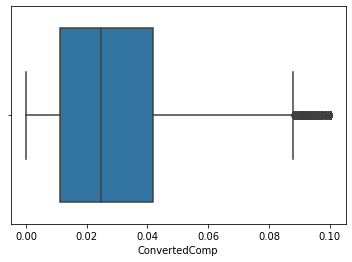

In [162]:
sns.boxplot(x=data_out['ConvertedComp'])

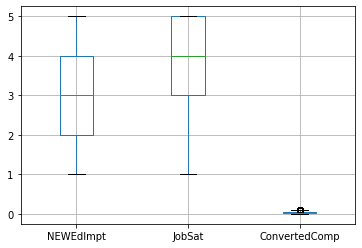

In [163]:
#checking equal variance with boxplot
boxplot = data_out.boxplot(column=['NEWEdImpt', 'JobSat', 'ConvertedComp'])

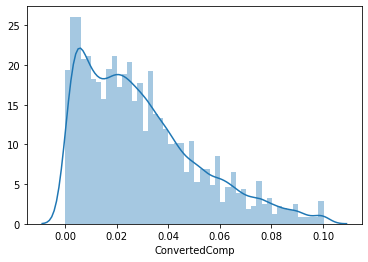

In [164]:
#plt.hist(data_out['ConvertedComp'])
#plt.show() 
sns.distplot(data_out['ConvertedComp'])

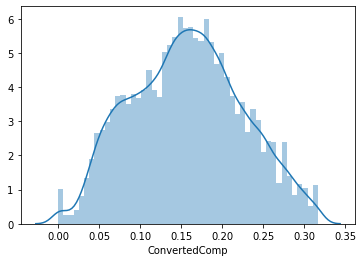

In [165]:
sqrdata=data_out['ConvertedComp']**(.5)
sns.distplot(sqrdata)


In [166]:
#perform two-way ANOVA
model = ols('ConvertedComp ~ C(NEWEdImpt) + C(JobSat) + C(NEWEdImpt):C(JobSat)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(NEWEdImpt),0.077062,4.0,1.499943,1.991915e-01
C(JobSat),0.962356,4.0,18.731442,2.147805e-15
C(NEWEdImpt):C(JobSat),0.211533,16.0,1.029325,4.207609e-01
Residual,439.102254,34187.0,NaN,NaN


In [167]:
#Since the p-values for NEWEdImpt and JobSat are both less than .05, 
#this means that both factors have a statistically significant effect on ConvertedComp.

#And since the p-value for the interaction effec is less than .05, 
#this tells us that there is significant interaction effect between NEWEdImpt and JobSat.